In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# computation
import numpy as np
import tensorflow as tf
import prettytensor as pt

# utility funcs
from numpy.random import uniform, random_sample,normal
from datetime import datetime
from scipy.stats import norm

# visualization
import matplotlib.pyplot as plt
from IPython import display
from IPython.display import HTML
from matplotlib import animation
import seaborn as sns
%matplotlib inline

# model
from Network.GAN import GAN

In [3]:
def viz_data(data, i):
    """Plot a scatterplot of the given data"""
    assert data.shape[1] == 1
    f, ax = plt.subplots(figsize=(6,4))
    # plot p_data
    x = np.linspace(-3,5,1000)
    y = norm.pdf(x, loc=1, scale=1)    # for example
    ax.plot(x,y, label='p_data')

    # draw data
    sns.distplot(data, label='data', norm_hist=True, ax=ax)
    
    # draw decision boundary
    f.suptitle('1D Generative Adversarial Network', fontsize=15)
    frame_text = ax.text(0.02, 0.95,'',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes)
    frame_text.set_text('Timestep = %.1d' % i)
    
    plt.legend()

In [4]:
data = normal(loc=1, scale=1, size=(20000,1))

In [5]:
g = GAN(hyper_params={'batch_size': 20000})

Building tensorflow graph
8
4


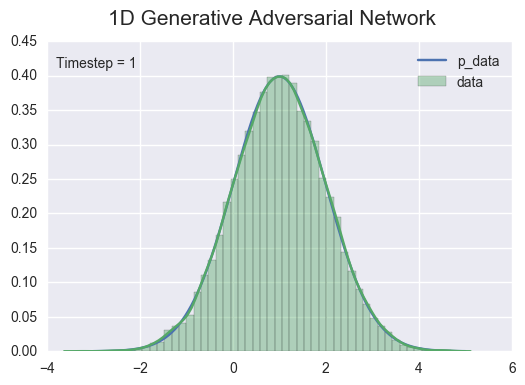

In [6]:
viz_data(data, 1)

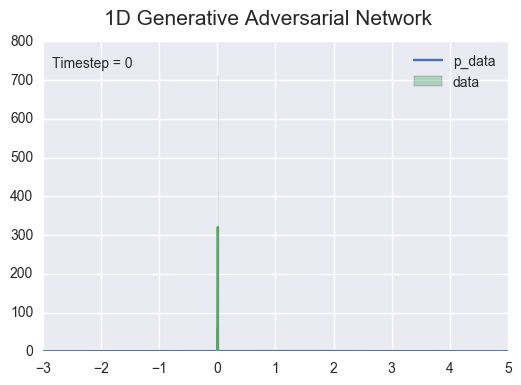

In [ ]:
viz_data(g.decode(),0)

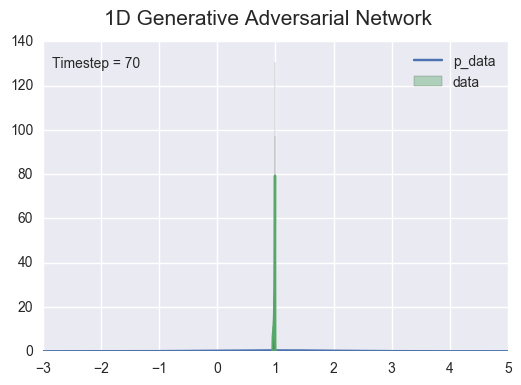

In [ ]:
for i in range(0,5000):
    g.train(data, num_epochs = 5, modulo=1, output = False)
    plt.clf()
    viz_data(g.decode(), i)
    plt.savefig('anim/step_{:05}.png'.format(i))
    display.display(plt.gcf())
    display.clear_output(wait=True)